# `Descriptive analytics` - Key Performance Indicators (KPIs)

In this notebook, we will make an attempt at defining Key Performance Indicators (KPIs) that are suitable to be included in a dashboard for bike sharing fleet operators, in this case the company "Divvy Bikes" from Chicago.

The KPIs that we will cover in the follwing are:
- (Number of new subscriptions)
- Share of subcribers and customers (development)
- Average ride duration
- Website/app traffic

The latter can be particularly interesting when compared to the actual bookings, i.e. the conversion. This could also help to accurately price the service.   

### 1. Share of subscribers and customers

Nowadays, subscriptions are a common way to generate income and to retain customers, escpecially for services that may not be used daily. 
However, subscription models tread a thin line when it comes to pricing, since people are often quite temperate when it comes to additional monthly/annual expenses. 

Let's give a shot at visualizing the annual subscription/customer share development:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

In [2]:
CGO_data = pd.read_csv("chicago_2018.csv")

In [3]:
CGO_data.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber
1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber
2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer
3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber
4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber


Plotting the user type share in the whole dataset, i.e. in year 2018

In [5]:
CGO_data['user_type'].value_counts()

Subscriber    2925926
Customer       677156
Name: user_type, dtype: int64

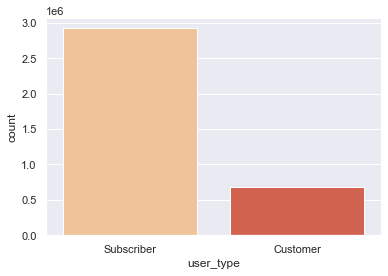

In [103]:
sns.countplot(x="user_type",data=CGO_data, palette="OrRd")

plt.show()

Let's now try to visualize the monthly development 

In [24]:
CGO_data['user_type'].value_counts(normalize=True)

Subscriber    0.812062
Customer      0.187938
Name: user_type, dtype: float64

In order to simplyfy further steps and to avoid any time related issues, we assign a new column "month" to the dataframe

In [56]:
CGO_data['start_time'] = pd.to_datetime(CGO_data['start_time'])
CGO_data["month"] = list(CGO_data["start_time"].dt.month)
CGO_data.sort_values(by=['start_time'], inplace = True)

In [59]:
CGO_data.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,month
3215937,2018-01-01 00:12:00,2018-01-01 00:17:23,69,159,Damen Ave & Pierce Ave,Claremont Ave & Hirsch St,3304,Subscriber,1
3215938,2018-01-01 00:41:35,2018-01-01 00:47:52,253,325,Winthrop Ave & Lawrence Ave,Clark St & Winnemac Ave (Temp),5367,Subscriber,1
3215939,2018-01-01 00:44:46,2018-01-01 01:33:10,98,509,LaSalle St & Washington St,Troy St & North Ave,4599,Subscriber,1
3215940,2018-01-01 00:53:10,2018-01-01 01:05:37,125,364,Rush St & Hubbard St,Larrabee St & Oak St,2302,Subscriber,1
3215941,2018-01-01 00:53:37,2018-01-01 00:56:40,129,205,Blue Island Ave & 18th St,Paulina St & 18th St,3696,Subscriber,1


Create a new dataframe that houses the monthly share of subscribers and customers

In [75]:
january_s = ((CGO_data.user_type == 'Subscriber') & (CGO_data["month"]==1)).sum()
febuary_s = ((CGO_data.user_type == 'Subscriber') & (CGO_data["month"]==2)).sum()
march_s = ((CGO_data.user_type == 'Subscriber') & (CGO_data["month"]==3)).sum()
april_s = ((CGO_data.user_type == 'Subscriber') & (CGO_data["month"]==4)).sum()
may_s = ((CGO_data.user_type == 'Subscriber') & (CGO_data["month"]==5)).sum()
june_s = ((CGO_data.user_type == 'Subscriber') & (CGO_data["month"]==6)).sum()
july_s = ((CGO_data.user_type == 'Subscriber') & (CGO_data["month"]==7)).sum()
august_s = ((CGO_data.user_type == 'Subscriber') & (CGO_data["month"]==8)).sum()
september_s = ((CGO_data.user_type == 'Subscriber') & (CGO_data["month"]==9)).sum()
october_s = ((CGO_data.user_type == 'Subscriber') & (CGO_data["month"]==10)).sum()
november_s = ((CGO_data.user_type == 'Subscriber') & (CGO_data["month"]==11)).sum()
december_s = ((CGO_data.user_type == 'Subscriber') & (CGO_data["month"]==12)).sum()

january_c = ((CGO_data.user_type == 'Customer') & (CGO_data["month"]==1)).sum()
febuary_c = ((CGO_data.user_type == 'Customer') & (CGO_data["month"]==2)).sum()
march_c = ((CGO_data.user_type == 'Customer') & (CGO_data["month"]==3)).sum()
april_c = ((CGO_data.user_type == 'Customer') & (CGO_data["month"]==4)).sum()
may_c = ((CGO_data.user_type == 'Customer') & (CGO_data["month"]==5)).sum()
june_c = ((CGO_data.user_type == 'Customer') & (CGO_data["month"]==6)).sum()
july_c = ((CGO_data.user_type == 'Customer') & (CGO_data["month"]==7)).sum()
august_c = ((CGO_data.user_type == 'Customer') & (CGO_data["month"]==8)).sum()
september_c = ((CGO_data.user_type == 'Customer') & (CGO_data["month"]==9)).sum()
october_c = ((CGO_data.user_type == 'Customer') & (CGO_data["month"]==10)).sum()
november_c = ((CGO_data.user_type == 'Customer') & (CGO_data["month"]==11)).sum()
december_c = ((CGO_data.user_type == 'Customer') & (CGO_data["month"]==12)).sum()

In [76]:
subscribers = pd.Series({'january': january_s, 'febuary': febuary_s,
                  'march': march_s, 'april': april_s,
                  'may': may_s, 'june': june_s, 'july': july_s, 'august': august_s,
                  'september': september_s,'october': october_s,'november': november_s,
                  'december': december_s,})

customers = pd.Series({'january': january_c, 'febuary': febuary_c,
                  'march': march_c, 'april': april_c,
                  'may': may_c, 'june': june_c, 'july': july_c, 'august': august_c,
                  'september': september_c,'october': october_c,'november': november_c,
                  'december': december_c,})

share = pd.DataFrame({'subscriber_count':subscribers, 'customer_count':customers})
share

,subscriber_count,customer_count
january,106216,3490
febuary,99540,3410
march,158946,15543
april,178264,21848
may,311609,89541
june,350264,108155
july,394437,150266
august,401989,128766
september,344211,93901
october,301196,43744


In [86]:
share["total"] = (share['customer_count']+share['subscriber_count'])

In [93]:
share["subscriber_share"] = (share['subscriber_count'] / share['total']) *100
share["customer_share"] = (share['customer_count'] / share['total']) *100
share

,subscriber_count,customer_count,total,subscriber_share,customer_share
january,106216,3490,109706,96.818770,3.181230
febuary,99540,3410,102950,96.687712,3.312288
march,158946,15543,174489,91.092275,8.907725
april,178264,21848,200112,89.082114,10.917886
may,311609,89541,401150,77.678923,22.321077
june,350264,108155,458419,76.406955,23.593045
july,394437,150266,544703,72.413223,27.586777
august,401989,128766,530755,75.739089,24.260911
september,344211,93901,438112,78.566896,21.433104
october,301196,43744,344940,87.318374,12.681626


<AxesSubplot:ylabel='subscriber_share'>

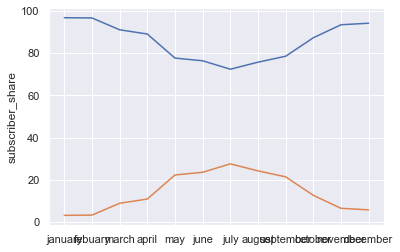

In [100]:
sns.lineplot(data=share, x=share.index, y="subscriber_share")
sns.lineplot(data=share, x=share.index, y="customer_share")

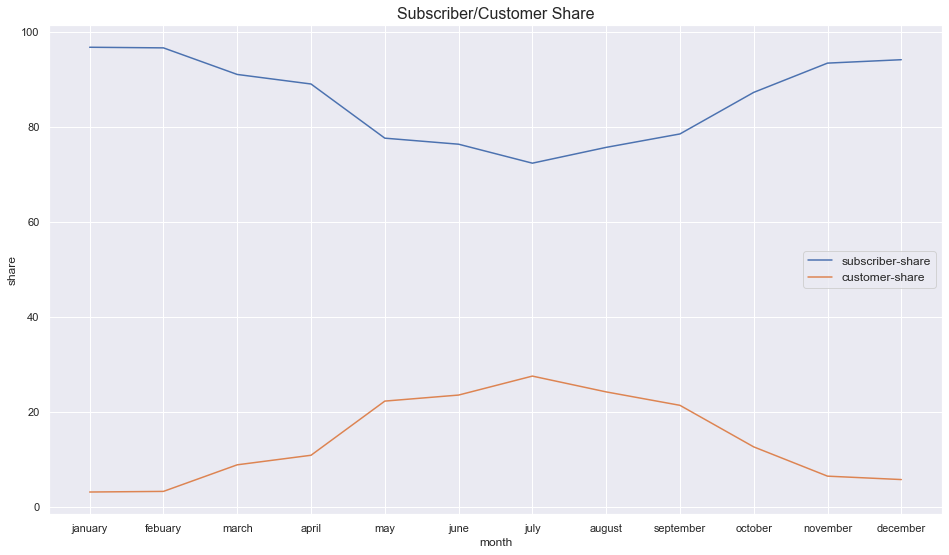

In [224]:
x1 = share.index
y1 = share["subscriber_share"]
y2 = share["customer_share"]

plt.figure(figsize=(16,9))

plt.plot(x1,y1,label="subscriber-share")
plt.plot(x1,y2,label="customer-share")

plt.xlabel('month')
plt.ylabel('share')
plt.title("Subscriber/Customer Share", fontsize=16, fontname="Arial")

plt.legend(loc=0, fontsize=12)

plt.show()

Unfortunately the subscriber/customer share development is not that interesting to be an own KPI, but definitely quite precious for the temporal demand patterns. 

Sidenote: Divvy Bikes ran a campain called "Stall Fall" with festivities at the bike stations in september 2018.
-> Incremental Sales?

### 2. Average ride duration

The average ride duration and it's development can be a good indicator of how well the service is adopted and how satisfied the customers are.

Lets go ahead and assign a new column "duration" to the dataset

In [177]:
CGO_data["duration"] = (pd.to_datetime(CGO_data["end_time"]) - pd.to_datetime(CGO_data["start_time"]))

In [178]:
CGO_data.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,month,duration
3215937,2018-01-01 00:12:00,2018-01-01 00:17:23,69,159,Damen Ave & Pierce Ave,Claremont Ave & Hirsch St,3304,Subscriber,1,0 days 00:05:23
3215938,2018-01-01 00:41:35,2018-01-01 00:47:52,253,325,Winthrop Ave & Lawrence Ave,Clark St & Winnemac Ave (Temp),5367,Subscriber,1,0 days 00:06:17
3215939,2018-01-01 00:44:46,2018-01-01 01:33:10,98,509,LaSalle St & Washington St,Troy St & North Ave,4599,Subscriber,1,0 days 00:48:24
3215940,2018-01-01 00:53:10,2018-01-01 01:05:37,125,364,Rush St & Hubbard St,Larrabee St & Oak St,2302,Subscriber,1,0 days 00:12:27
3215941,2018-01-01 00:53:37,2018-01-01 00:56:40,129,205,Blue Island Ave & 18th St,Paulina St & 18th St,3696,Subscriber,1,0 days 00:03:03


In [179]:
CGO_data.duration.mean()

Timedelta('0 days 00:23:33.138314642')

The average ride around is 23 minutes and 33 seconds long.

In [180]:
january_d = (CGO_data.duration[CGO_data["month"] == 1].mean())
febuary_d = CGO_data.duration[CGO_data["month"] == 2].mean()
march_d = CGO_data.duration[CGO_data["month"] == 3].mean()
april_d = CGO_data.duration[CGO_data["month"] == 4].mean()
may_d = CGO_data.duration[CGO_data["month"] == 5].mean()
june_d = CGO_data.duration[CGO_data["month"] == 6].mean()
july_d = CGO_data.duration[CGO_data["month"] == 7].mean()
august_d = CGO_data.duration[CGO_data["month"] == 8].mean()
september_d = CGO_data.duration[CGO_data["month"] == 9].mean()
october_d = CGO_data.duration[CGO_data["month"] == 10].mean()
november_d = CGO_data.duration[CGO_data["month"] == 11].mean()
december_d = CGO_data.duration[CGO_data["month"] == 12].mean()

january_d = january_d.seconds/60
febuary_d = febuary_d.seconds/60
march_d = march_d.seconds/60
april_d = april_d.seconds/60
may_d = may_d.seconds/60
june_d = june_d.seconds/60
july_d = july_d.seconds/60
august_d = august_d.seconds/60
september_d = september_d.seconds/60
october_d = october_d.seconds/60
november_d = november_d.seconds/60
december_d = december_d.seconds/60

In [181]:
average_duration = pd.Series({'january': january_d, 'febuary': febuary_d,
                  'march': march_d, 'april': april_d,
                  'may': may_d, 'june': june_d, 'july': july_d, 'august': august_d,
                  'september': september_d,'october': october_d,'november': november_d,
                  'december': december_d,})

duration = pd.DataFrame({'average_duration':average_duration})
duration

,average_duration
january,18.383333
febuary,16.066667
march,17.266667
april,20.350000
may,24.783333
june,25.800000
july,29.416667
august,27.233333
september,24.383333
october,18.733333


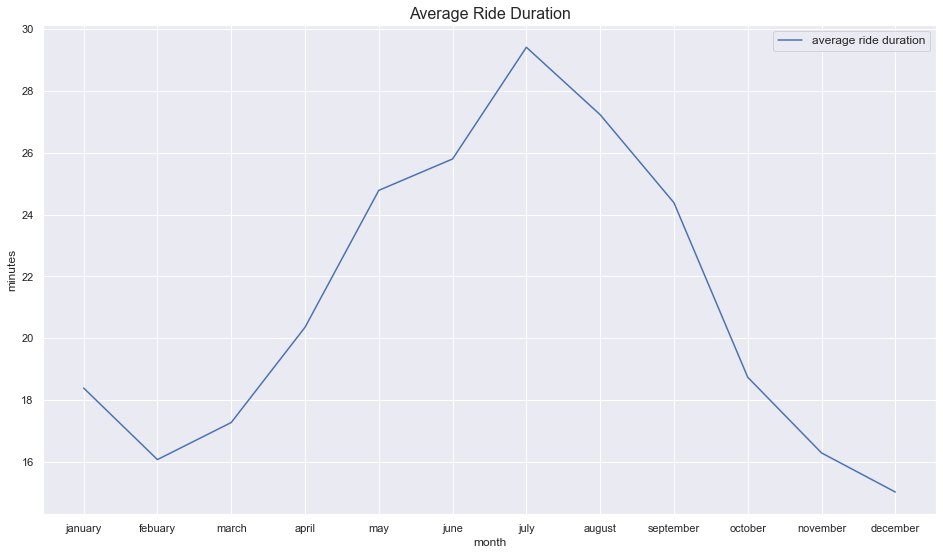

In [182]:
x2 = duration.index
y3 = duration["average_duration"]

plt.figure(figsize=(16,9))

plt.plot(x2,y3,label="average ride duration")

plt.xlabel('month')
plt.ylabel('minutes')
plt.title("Average Ride Duration", fontsize=16, fontname="Arial")

plt.legend(loc=0, fontsize=12)

plt.show()

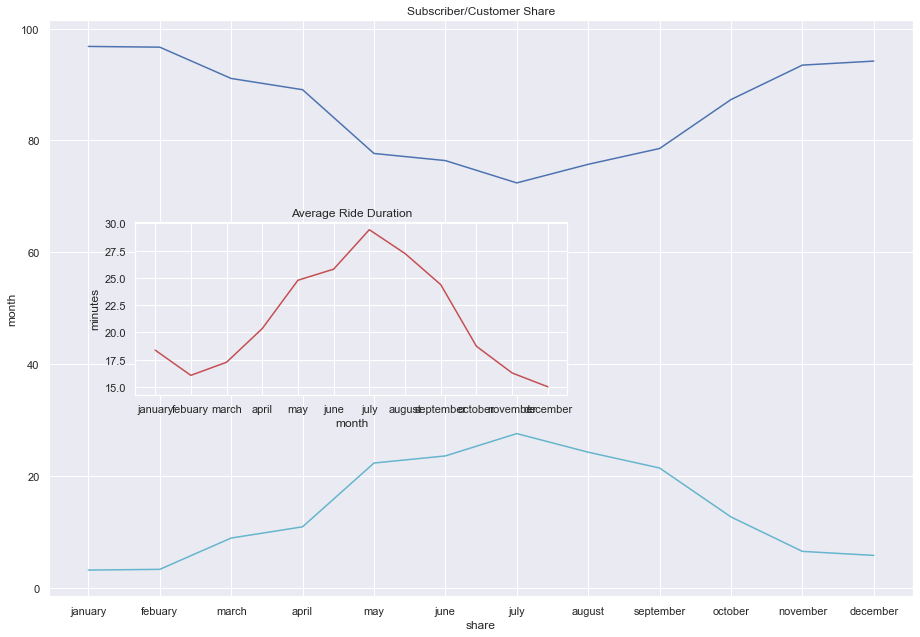

In [223]:
# empty work space
Fig_2 = plt.figure()

ax_2 = Fig_2.add_axes([0.1, 0.1, 2, 2]) # main axes
ax_3 = Fig_2.add_axes([0.3, 0.8, 1, 0.6]) # added axes

# Larger diagramm with axes 1
ax_2.plot(x1, y1, 'b')
ax_2.plot(x1,y2,'c')
ax_2.set_xlabel('share')
ax_2.set_ylabel('month')
ax_2.set_title('Subscriber/Customer Share')



# Larger diagramm with axes 2
ax_3.plot(x2,y3,'r')
ax_3.set_xlabel('month')
ax_3.set_ylabel('minutes')
ax_3.set_title('Average Ride Duration')

plt.show()